# **Background: Classification of fire vs no-fire images**
In this miniproject you will attempt to identify fires from aerial vehicle cameras.
From the dataset creators, "Wildfires are one of the deadliest and dangerous natural disasters in the world. Wildfires burn millions of forests and they put many lives of humans and animals in danger. Predicting fire behavior can help firefighters to have better fire management and scheduling for future incidents and also it reduces the life risks for the firefighters. Recent advance in aerial images shows that they can be beneficial in wildfire studies. Among different methods and technologies for aerial images, Unmanned Aerial Vehicles (UAVs) and drones are beneficial to collect information regarding the fire."

### **Specific Task: Binary Classification**
Develop a machine learning classifier that can accurately perform the binary classification Fire vs No Fire

## **Preprocess Data Overview**

The data was obtained by recording a prescribed burning region using an aerial vehicle hence the original data is in the form of a video and the individual frames forms the basis of our dataset. Although we were given roughly 40000 images, there is a lots of similarity between most of the images therefore the best choice (for reducing the size of the dataset and hence being less computational expensive) is to select a variation of images and neglect the repeated images.

For the binary classification of fire vs no-fire images, we have taken a total of 400 training images that consists of 200 training images of the fire class and 200 training images of the no-fire class. Furthermore, we have done the same procedure for testing images to obtain 400 testing images. We also ensure that we have normalise our images by dividing by 255.0.

For binary labels, we have decided to use 0 and 1 corresponding to fire and no-fire class respectively.

We have form our training dataset by concatenating the fire, no-fire train images together (similarly for testing dataset). After, we have use sklearn library function to shuffle our dataset such that the mapping between the binary labels (0 and 1) to the training dataset is consistent (similarly for testing dataset).

To enhance our dataset variation, we have make use of data augmentation which applies random rotation and horizontal flips to our images. This will prove to be very useful when it comes to helping the model to generalise to unseen scenario (better prediction).

Finally, we have splitted the training dataset further into 70% training dataset and 30% validation dataset. The reason is that later while we are training our model, we could monitor our model to see if there is any overfitting occuring throughout each epoch.






In [ ]:
#Import standard libraries and imageio to read in the images
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
# We have store our selected images (both training and testing images) in google drive
# We will extract the images to google colab from google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### **Extracting Training Data Set**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# directory of the images
dataset_root_folder='drive/MyDrive/MiniprojectdataML/'
dataset_train_fire = 'Training_data_fire/'
dataset_train_lake = 'Training_data_lake/'

# extracting the fire images
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder,dataset_train_fire)):

    images_train_fire = os.listdir(path)

    # creating storage for images
    fire_img = np.zeros((len(images_train_fire),254,254,3))

    for i, image_name in enumerate(images_train_fire):
        fire_img[i]=mpimg.imread(dataset_root_folder + dataset_train_fire + image_name)/255.0
        # normalising the pixel by dividing 255
        # (note: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers))

# extracting the no-fire images
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder,dataset_train_lake)):

    images_train_no_fire = os.listdir(path)

    # creating storage for images
    no_fire_img = np.zeros((len(images_train_no_fire),254,254,3))

    for i, image_name in enumerate(images_train_no_fire):
        no_fire_img[i]=mpimg.imread(dataset_root_folder + dataset_train_lake + image_name)/255.0
        # normalising the pixel by dividing 255
        # (note: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers))

# we will combine our fire and no-fire training data to form one single array of training data
# Using loop to create the fire/ no-fire label in the corresponding order to the training data.

# we are going to join fire_img with the no_fire_img using concatenation

training_images=np.append(fire_img,no_fire_img,axis=0)  # resulting in (400x254x254x3) array

#creating the storage for training_labels
training_labels= np.zeros(len(training_images))

for i in range(len(training_images)):
    # using 0 and 1 to represent Fire and no-Fire respectively

    if i <= 199: # from index 0 to 199, it was fire images
        training_labels[i]=0

    else:        # from index 200 to 399, it was no-fire images
        training_labels[i]=1

# shuffle the training images and labels using sklearn which has the advantage of not disrupting the mapping between the pixel image and the labels
X_training_images=training_images [:]
Y_training_labels=training_labels [:]

from sklearn.utils import shuffle
X_training_images,Y_training_labels = shuffle(X_training_images,Y_training_labels)



print("The array shape of the training image is",X_training_images.shape)
print("The array shape of the training label is",Y_training_labels.shape)


The array shape of the training image is (400, 254, 254, 3)
The array shape of the training label is (400,)


### **Extracting Testing Data Set**

In [ ]:
# directory of the images
dataset_root_folder='drive/MyDrive/MiniprojectdataML/'
dataset_test_fire = 'Testing_data_fire/'
dataset_test_no_fire = 'Testing_data_no_fire/'

# extracting the fire images
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder,dataset_test_fire)):

    images_test_fire = os.listdir(path)

    # creating storage for images
    test_fire_img = np.zeros((len(images_test_fire),254,254,3))

    for i, image_name in enumerate(images_test_fire):
        test_fire_img[i]=mpimg.imread(dataset_root_folder + dataset_test_fire + image_name)/255.0
        # normalising the pixel by dividing 255
        # (note: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers))

# extracting the no-fire images
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder,dataset_test_no_fire)):

    images_test_no_fire = os.listdir(path)

    # creating storage for images
    test_no_fire_img = np.zeros((len(images_test_no_fire),254,254,3))

    for i, image_name in enumerate(images_test_no_fire):
        test_no_fire_img[i]=mpimg.imread(dataset_root_folder + dataset_test_no_fire + image_name)/255.0
        # normalising the pixel by dividing 255
        # (note: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers))



# we will combine our fire and no-fire testing data to form one single testing data
# Using loop to create the fire/ no-fire label in the corresponding order to the testing data.

# we are going to join fire_img with the no_fire_img using concatenation

test_images=np.append(test_fire_img,test_no_fire_img,axis=0)  # resulting in (400x254x254x3) array

#creating the storage for training_labels
test_labels= np.zeros(len(test_images))

for i in range(len(test_images)):
    # using 0 and 1 to represent Fire and no-Fire respectively
    if i <= 199:
        test_labels[i]=0
    else:
        test_labels[i]=1

# shuffle the testing images and labels using sklearn which has the advantage of not disrupting the mapping between the pixel image and the labels
X_test_images=test_images [:]
Y_test_labels=test_labels [:]

from sklearn.utils import shuffle
X_test_images,Y_test_labels = shuffle(X_test_images,Y_test_labels,random_state=0)
print(X_test_images.shape)

(400, 254, 254, 3)


In [ ]:





# Before we train, we need to split the training data into training data, validation data
# Let's take 70% for training data and 30% for validation data


size_of_data = int(len(X_training_images))

train_size = int(size_of_data*0.7)


train_img = X_training_images[:train_size]
train_lab = Y_training_labels[:train_size]
valid_img = X_training_images[train_size:]
valid_lab = Y_training_labels[train_size:]


print('The array shape of training dataset is', train_img.shape)
print('The array shape of validation dataset is', valid_img.shape)

The array shape of training dataset is (280, 254, 254, 3)
The array shape of validation dataset is (120, 254, 254, 3)


## **Designing and Training Model**

In terms of choosing a design of the model that is suitable for our binary classification of images, we have taken inspiration from [arxiv paper](https://arxiv.org/pdf/2012.14036.pdf) and we have chosen a CNN model called Xception network (proposed by Google-Keras) for our task. We have made modification to the CNN model such as reducing the number of kernel in each convolutional layer (in order to lower the trainable parameters hence significantly decreases the computational power) and added additional dropout and batch-normalisation layers (in order to prevent overfitting).

In [ ]:

## importing the necessary library


import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)



2.15.0


In [ ]:
# Data augmentation
data_augmentation1 = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.1),
])


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
model=Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(254,254,3)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(3, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(2,activation='softmax'))

model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model.summary()

#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 252, 252, 16)      448       
                                                                 
 dropout_72 (Dropout)        (None, 252, 252, 16)      0         
                                                                 
 batch_normalization_108 (B  (None, 252, 252, 16)      64        
 atchNormalization)                                              
                                                                 
 max_pooling2d_108 (MaxPool  (None, 126, 126, 16)      0         
 ing2D)                                                          
                                                                 
 conv2d_109 (Conv2D)         (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_109 (MaxPool  (None, 62, 62, 32)      

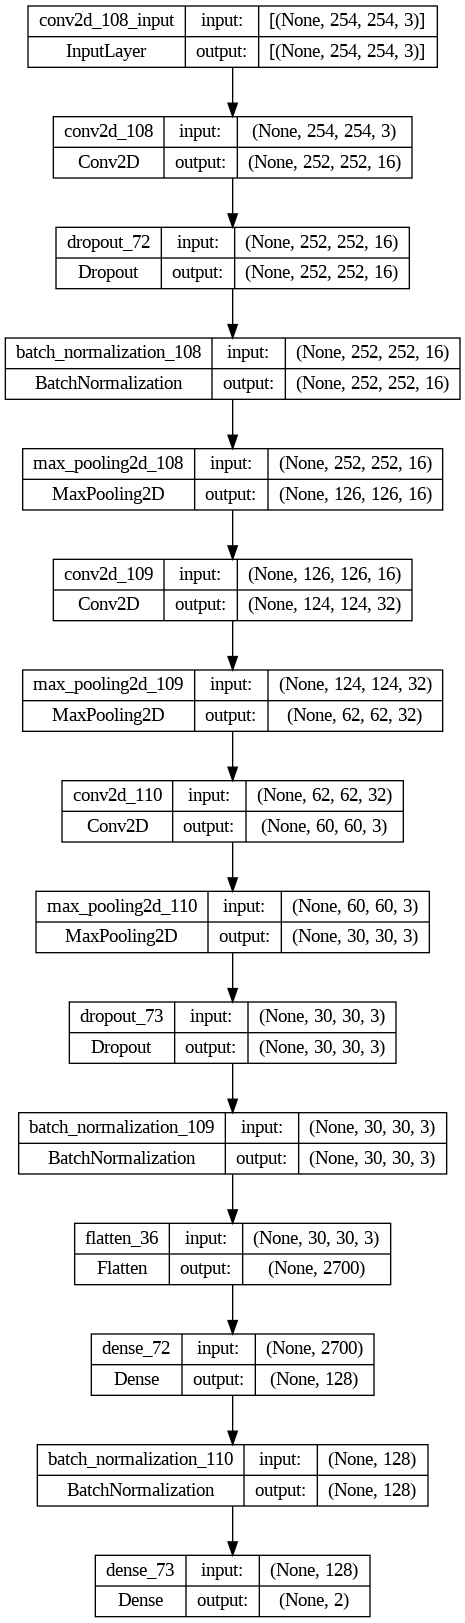

In [ ]:
# Flowchart of our CNN model
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Callback is used to terminate the training when the validation dataset accuracy is dropping to prevent overfitting
# We have data augmented our training and validation images to help the model to generalise to unseen data later on when we carry out the evaluation using testing data

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',start_from_epoch=5,baseline=0.9,patience=1)
hist = model.fit(data_augmentation1(train_img),train_lab, batch_size=120,epochs=40, validation_data=(data_augmentation1(valid_img),valid_lab),callbacks=[callback])


Epoch 1/40
3/3 [==============================] - 3s 249ms/step - loss: 0.3683 - accuracy: 0.8036 - val_loss: 0.8214 - val_accuracy: 0.5333
Epoch 2/40
3/3 [==============================] - 0s 124ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 1.5818 - val_accuracy: 0.5333
Epoch 3/40
3/3 [==============================] - 0s 122ms/step - loss: 5.6899e-04 - accuracy: 1.0000 - val_loss: 1.8922 - val_accuracy: 0.5333
Epoch 4/40
3/3 [==============================] - 0s 122ms/step - loss: 1.9585e-04 - accuracy: 1.0000 - val_loss: 1.7930 - val_accuracy: 0.5333
Epoch 5/40
3/3 [==============================] - 0s 121ms/step - loss: 4.5073e-05 - accuracy: 1.0000 - val_loss: 1.4008 - val_accuracy: 0.5333
Epoch 6/40
3/3 [==============================] - 0s 122ms/step - loss: 3.2352e-04 - accuracy: 1.0000 - val_loss: 0.8881 - val_accuracy: 0.5833
Epoch 7/40
3/3 [==============================] - 0s 123ms/step - loss: 0.0035 - accuracy: 0.9964 - val_loss: 0.3894 - val_accuracy: 0.6750
Epoc

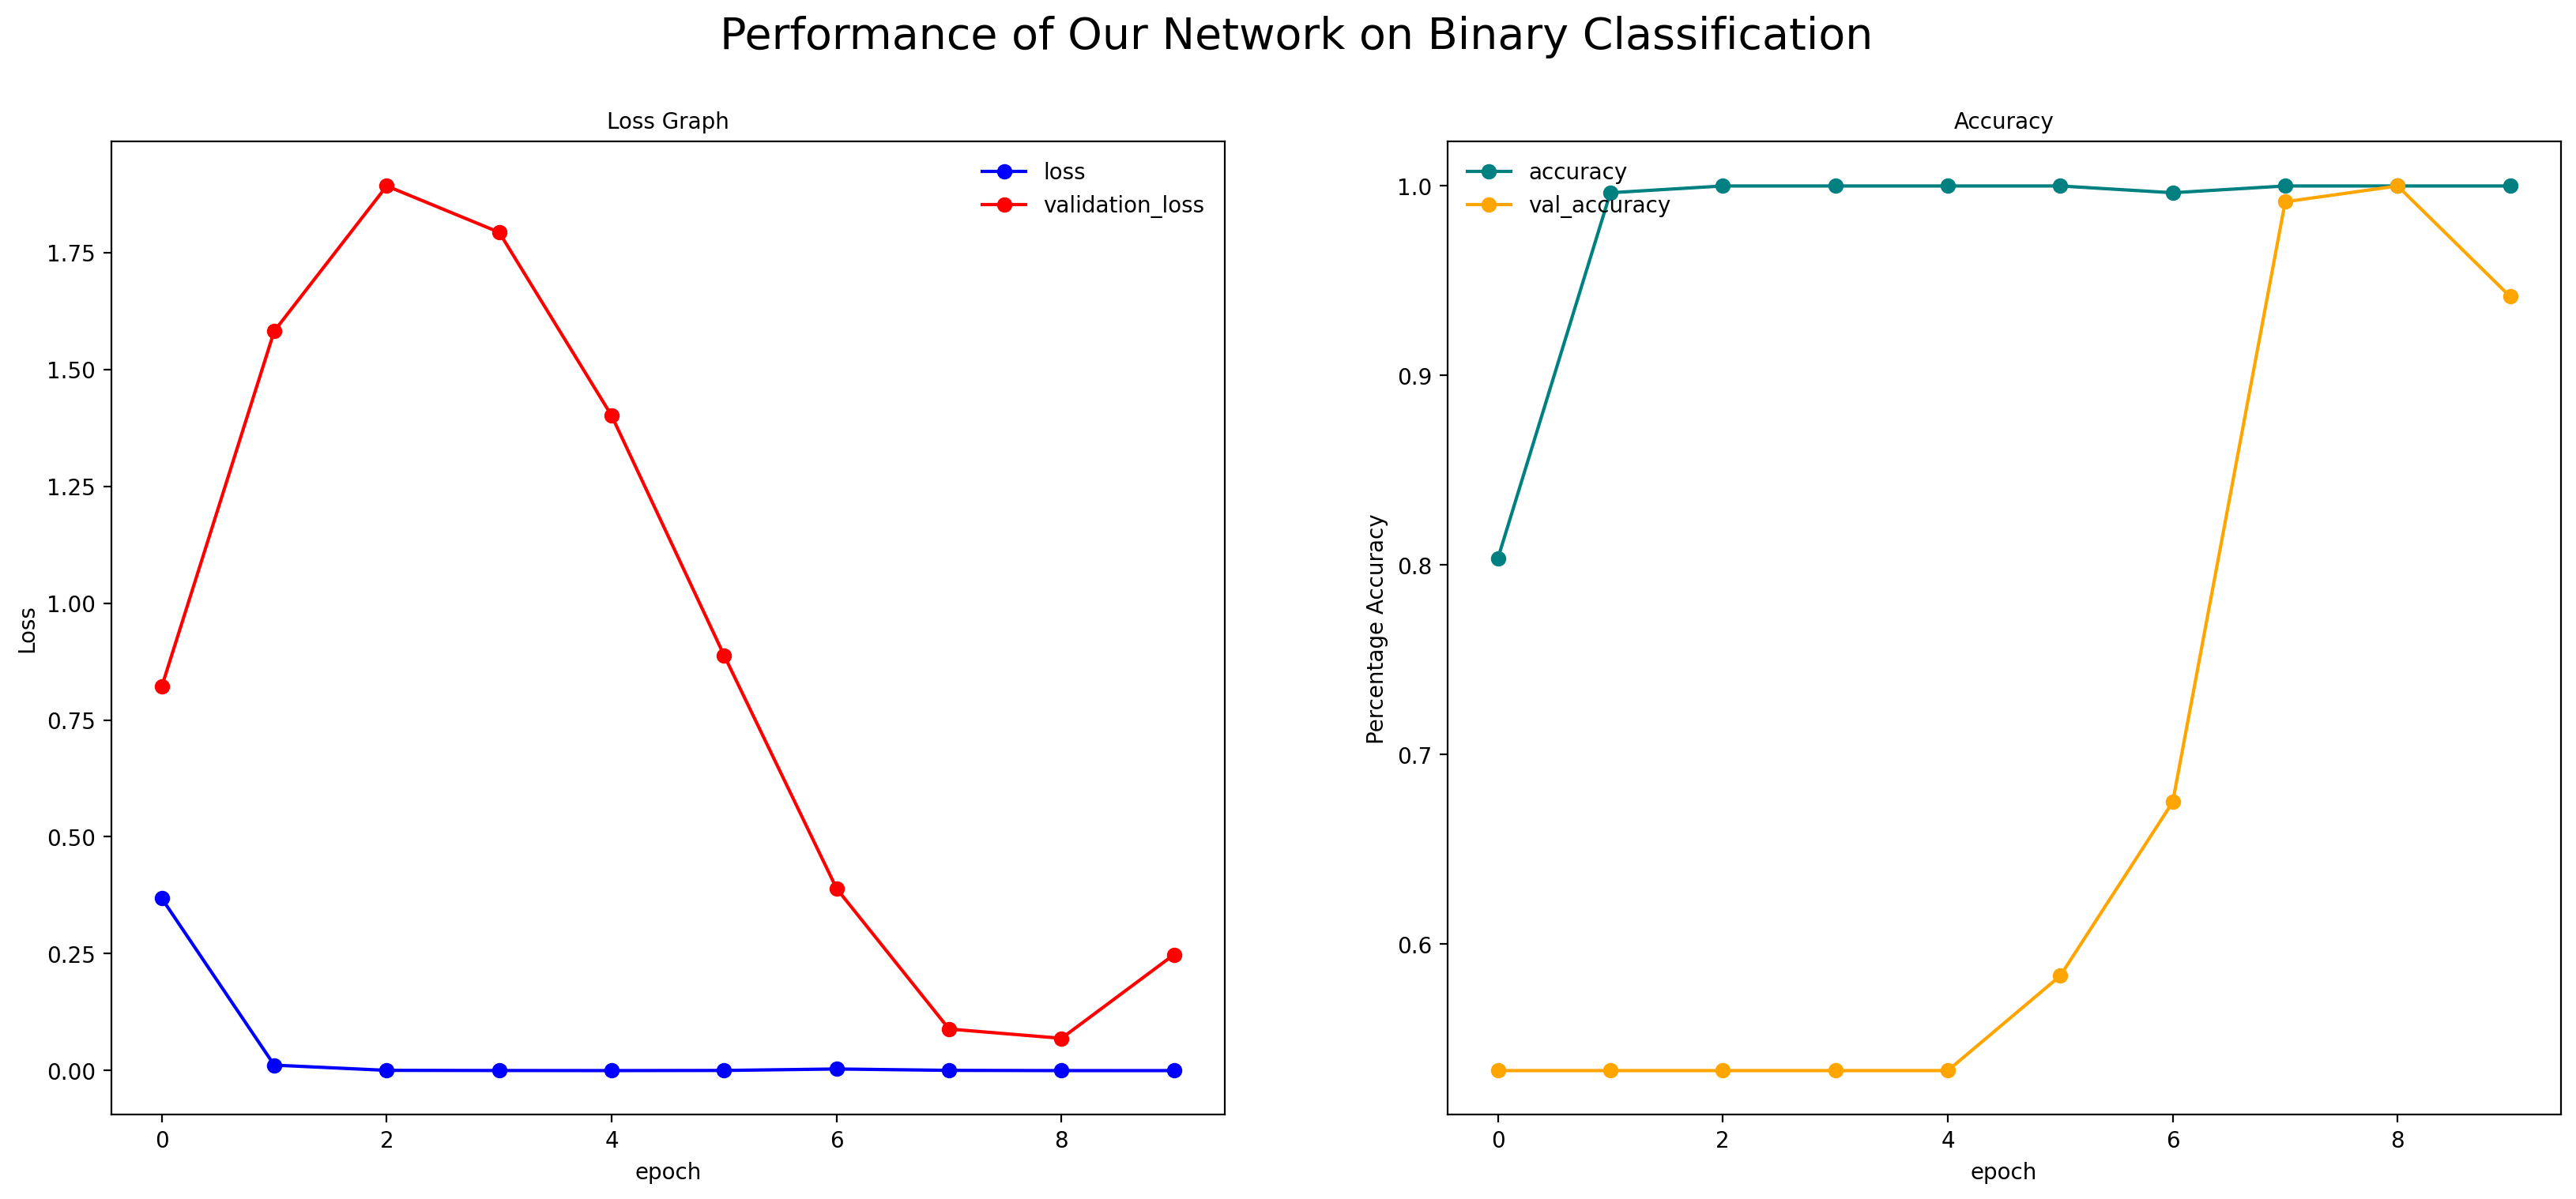

In [ ]:
# A plot of our model performance which is quantified by loss and accuracy

fig,ax=plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Performance of Our Network on Binary Classification',size=20)


ax[0].plot(hist.history['loss'],color='blue',label='loss',marker='o')
ax[0].plot(hist.history['val_loss'],color='red',label='validation_loss',marker='o')
ax[0].set_title("Loss Graph",fontsize=10)
ax[0].set_ylabel("Loss")
ax[0].set_xlabel('epoch')
ax[0].legend(loc='upper right')



ax[1].plot(hist.history['accuracy'], color='teal', label='accuracy',marker='o')
ax[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy',marker='o')
ax[1].set_title("Accuracy",fontsize=10)
ax[1].set_ylabel("Percentage Accuracy")
ax[1].set_xlabel('epoch')
ax[1].legend(loc='upper left')

fig.savefig('Our Model Binary Classification Performance')

## Comment
After epoch 6, we are starting to see a divergence behaviour between the training dataset loss and validation dataset loss which suggests that we are starting to overfit the model to the training dataset. To prevent this, we have use earlystopping which intentionally stop the training process of the model early right before the model begins to overfit.

## **Performance Metrics**

In [ ]:
test_loss,test_acc = model.evaluate(data_augmentation1(X_test_images),Y_test_labels, verbose=1)

13/13 [==============================] - 0s 11ms/step - loss: 0.3281 - accuracy: 0.8925


In [ ]:
print("The test accuracy for binary classification is "+str(test_acc*100)+"%")
print("The test loss value for binary classification is "+ str(test_loss))

The test accuracy for binary classification is 89.24999833106995%
The test loss value for binary classification is 0.3280620276927948


In [ ]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["First 20th True Test_image_label", "Fire Label Prediction Precentage (%)", "No-Fire Label Prediction Percentage (%)"])

# Showing the first 20th prediction
Prediction = model.predict(X_test_images)[:19]
Fire_label_prediction = Prediction[:][:,0]
No_fire_label_prediction = Prediction[:][:,1]

for i in zip(Y_test_labels[:19],Fire_label_prediction,No_fire_label_prediction):
    myTable.add_row([i[0],i[1]*100,i[2]*100])

print(myTable)
print('Labels are defined as 0 and 1 corresponding to fire and no-fire images respectively')



13/13 [==============================] - 0s 10ms/step
+----------------------------------+--------------------------------------+-----------------------------------------+
| First 20th True Test_image_label | Fire Label Prediction Precentage (%) | No-Fire Label Prediction Percentage (%) |
+----------------------------------+--------------------------------------+-----------------------------------------+
|               0.0                |          7.498995214700699           |            92.50100255012512            |
|               1.0                |          1.4317220076918602          |            98.56827855110168            |
|               1.0                |          81.90441727638245           |            18.095585703849792           |
|               0.0                |          97.01991677284241           |             2.98007782548666            |
|               1.0                |          0.387919950298965           |            99.61207509040833            |
| 

## Comment on the table above
The table show the prediction of the model for the first 20 testing images and each of the class probability.

In [ ]:
# in this python cell, we want to find the precision and recall of our model

from sklearn.metrics import confusion_matrix, precision_score, recall_score

# finding the prediction from the probability predicted by the model
Prediction = model.predict(X_test_images)  # (400,2) which give the probability of fire and no-fire for an input image
y_pred = np.zeros(len(Prediction)) # storage for prediction 0,1 corresponding to fire and no-fire prediction

# we set a condition that if the probaility of fire is larger than the probability of no fire, take the prediction as fire
for i in range (len(Prediction)):
    if Prediction[i][0] > Prediction[i][1]:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

# Assuming y_true contains your true labels and y_pred contains your model predictions
y_true = Y_test_labels # True labels
y_pred = y_pred # Prediction labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Alternatively, use scikit-learn's built-in functions
precision_sklearn = precision_score(y_true, y_pred)
recall_sklearn = recall_score(y_true, y_pred)

print(f"Precision: {precision}, Recall: {recall}")
print(f"Precision (sklearn): {precision_sklearn}, Recall (sklearn): {recall_sklearn}")

13/13 [==============================] - 0s 10ms/step
Precision: 0.8823529411764706, Recall: 0.825
Precision (sklearn): 0.8823529411764706, Recall (sklearn): 0.825


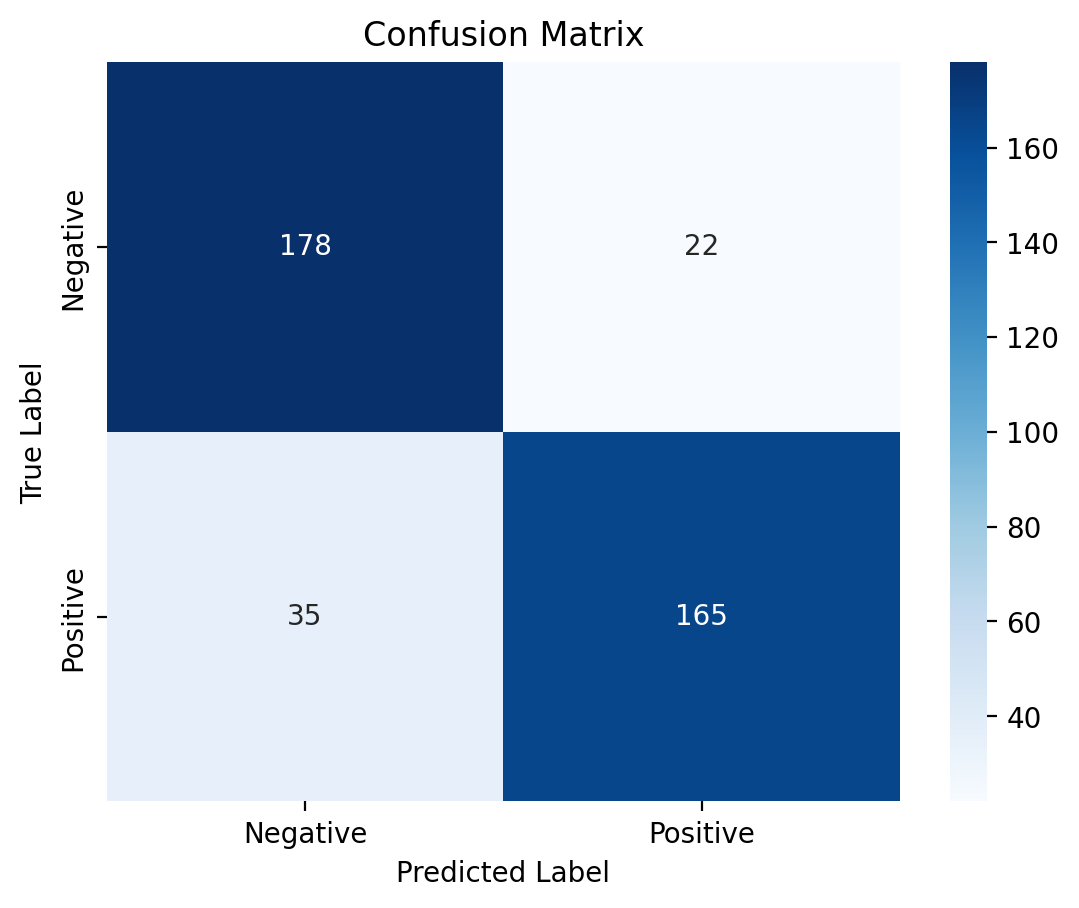

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For a nicer looking plot


# Plot the confusion matrix using Seaborn for a nicer looking plot
# If you don't want to use seaborn, you can directly use plt.matshow() or plt.imshow()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

fig.savefig('Confusion Matrix for Binary Classification')

## Comment on the Confusion Matrix Graph
This graph show the number of true positive, true negative, false positive and false negative where positive and negative corresponds to fire and no-fire class.

In [ ]:
# tabulating our performance metric into a table
from prettytable import PrettyTable

# training set performance metric
accuracy_training = round(hist.history['accuracy'][-1],4) *100
loss_training = round(hist.history['loss'][-1],7)

# validation set performance metric
accuracy_valid = round(hist.history['val_accuracy'][-1],4)*100
loss_valid = round(hist.history['val_loss'][-1],2)

# testing set performance metric
loss_test = round(test_loss,2)
accuracy_test = round(test_acc,4)*100
precision_test = round(precision,4)*100
recall_test = round(recall,4)*100

# creating table
Binary_Classification_M = PrettyTable(["Dataset", "Loss", "Accuracy(%)",'Precision (%)','Recall(%)'])
Binary_Classification_M.add_row(['Training Set', loss_training, accuracy_training, '--', '--' ])
Binary_Classification_M.add_row(['Validation Set', loss_valid, accuracy_valid, '--', '--' ])
Binary_Classification_M.add_row(['Testing Set', loss_test, accuracy_test, precision_test, recall_test ])

print(Binary_Classification_M)

+----------------+----------+-------------+---------------+-----------+
|    Dataset     |   Loss   | Accuracy(%) | Precision (%) | Recall(%) |
+----------------+----------+-------------+---------------+-----------+
|  Training Set  | 1.75e-05 |    100.0    |       --      |     --    |
| Validation Set |   0.25   |    94.17    |       --      |     --    |
|  Testing Set   |   0.33   |    89.25    |     88.24     |    82.5   |
+----------------+----------+-------------+---------------+-----------+


## **Overall Comment**
Overally, we have achieve quite a high accuracy (89.25%) when performing a binary classification on the testing data compare to the accuracy given in this paper [arxiv paper](https://arxiv.org/pdf/2012.14036.pdf) which is 76.23%. This might be due to the nature of our dataset which is that they have lots of similarity in common and differ only by image magnification and perspective angle on the region of interest (RIOs). Furthermore, to measure the confidence of the model accuracy, we have measure the precision and recall whcih are 88.24% and 82.5% respectively.

## **Visualising the effect of Convolutional Layer on Images**

We have build rebuild our binary classification model up to the last convolution layer (before flatten layer) to see the convolutional feature map of our input image in the latent space. Note that we have not trained this model using our training dataset so the weights between the layers are not optimised hence at the current stage the model might not pick out essential feature (the fire region) that will allow it to distinguish between fire and no-fire image.

In [ ]:
# rebuilding our model up to the last convolutional layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
model2=Sequential()

model2.add(Conv2D(16, (3,3), activation='relu', input_shape=(254,254,3)))
model2.add(Dropout(0.3))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(3, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())

model2.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 252, 252, 16)      448       
                                                                 
 dropout_74 (Dropout)        (None, 252, 252, 16)      0         
                                                                 
 batch_normalization_111 (B  (None, 252, 252, 16)      64        
 atchNormalization)                                              
                                                                 
 max_pooling2d_111 (MaxPool  (None, 126, 126, 16)      0         
 ing2D)                                                          
                                                                 
 conv2d_112 (Conv2D)         (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_112 (MaxPool  (None, 62, 62, 32)      

Those are the fire test image's feature maps of the last convolutional layer for the untrained model (in latent space)
1/1 [==============================] - 0s 19ms/step


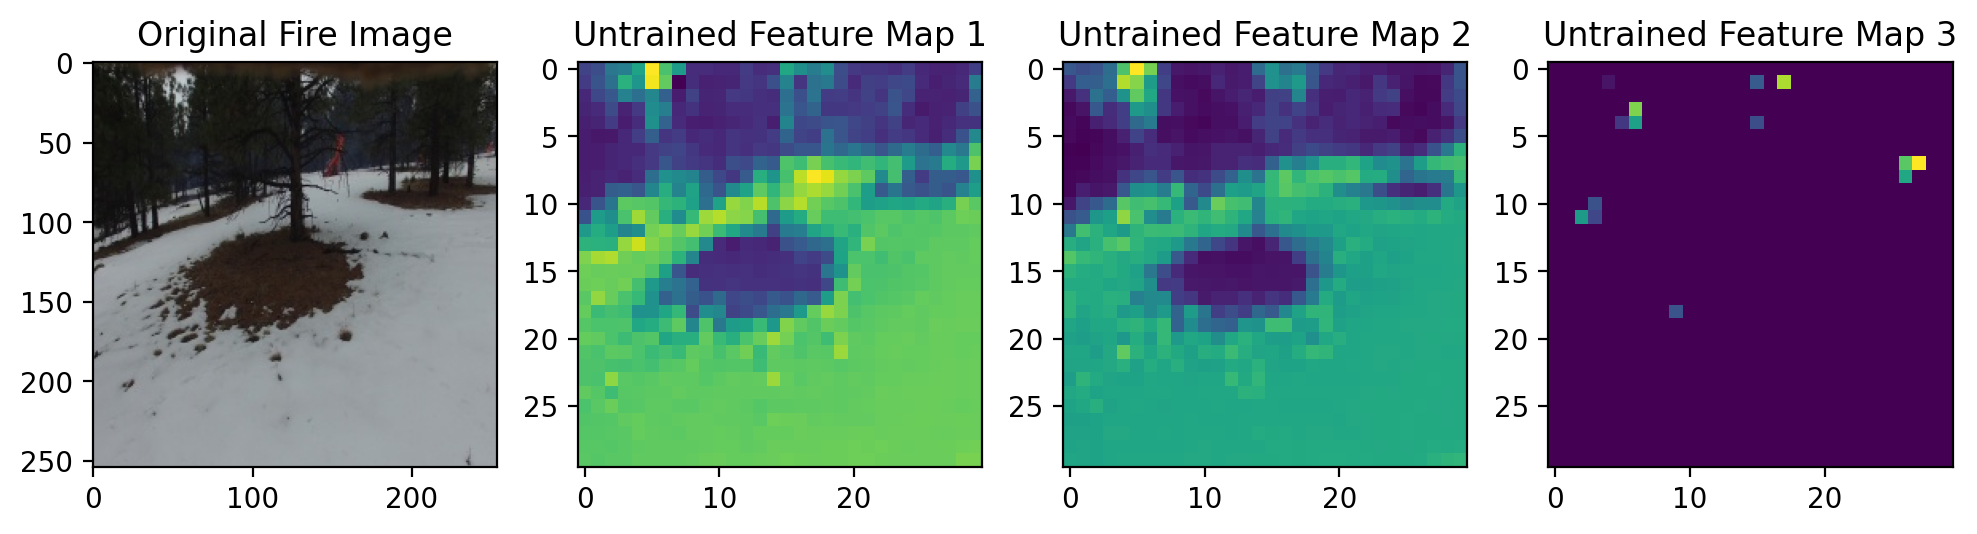

In [ ]:
# visualising the last convolutional layer of the untrained model

print("Those are the fire test image's feature maps of the last convolutional layer for the untrained model (in latent space)")
g=model2.predict(np.array([X_test_images[0]]))
# plots of non-trained model's features maps
fig,ax=plt.subplots(1,4,figsize=(12,12))

ax[0].imshow(X_test_images[0])
ax[0].set_title('Original Fire Image')

ax[1].imshow(g[0][:,:,0])
ax[1].set_title('Untrained Feature Map 1')

ax[2].imshow(g[0][:,:,1])
ax[2].set_title('Untrained Feature Map 2')

ax[3].imshow(g[0][:,:,2])
ax[3].set_title('Untrained Feature Map 3')

fig.savefig('Binary Classification: Last Convolutional Layer untrained model for fire-image')


Those are the no-fire test image's feature maps of the last convolutional layer for the untrained model (in latent space)
1/1 [==============================] - 0s 19ms/step


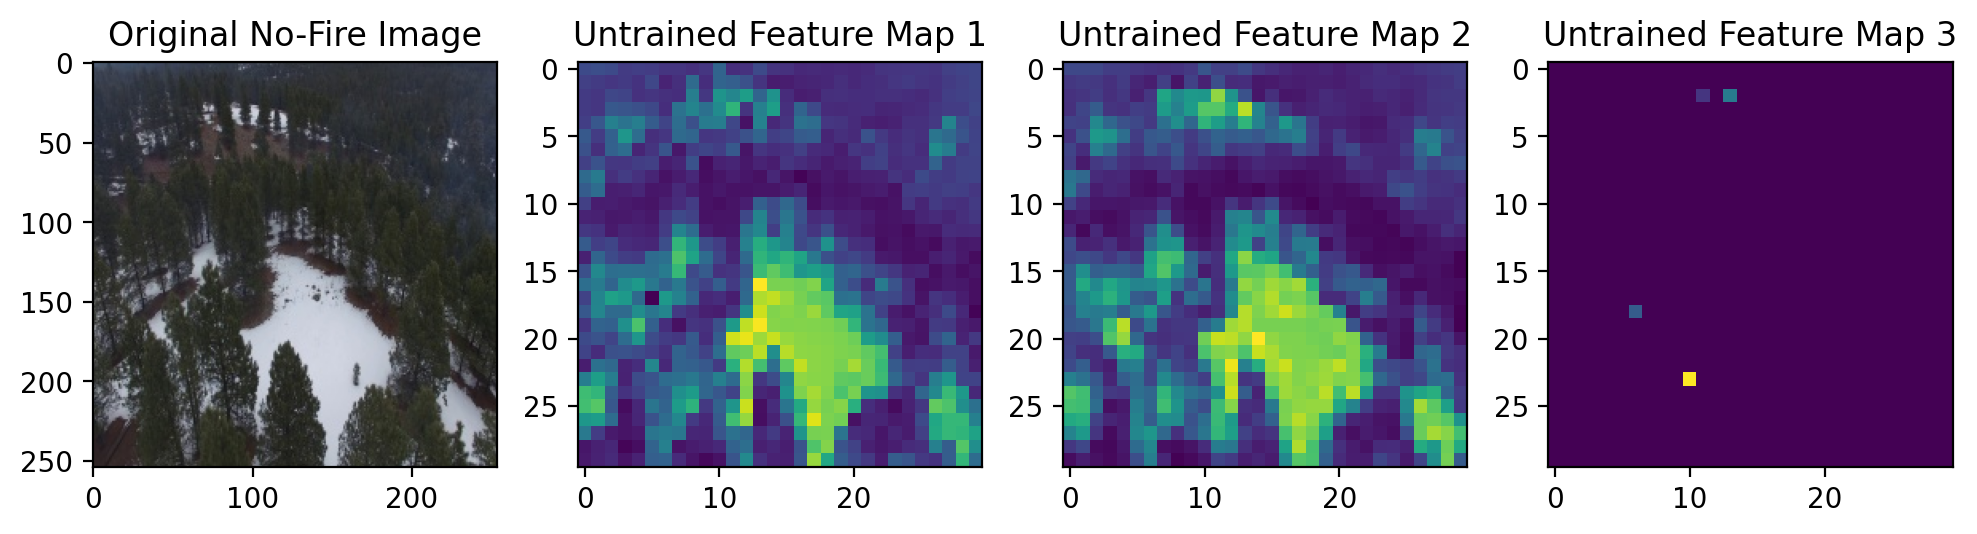

In [ ]:
# visualising the last convolutional layer of the untrained model

print("Those are the no-fire test image's feature maps of the last convolutional layer for the untrained model (in latent space)")
g=model2.predict(np.array([X_test_images[1]]))
# plots of non-trained model's features maps
fig,ax=plt.subplots(1,4,figsize=(12,12))

ax[0].imshow(X_test_images[1])
ax[0].set_title('Original No-Fire Image')

ax[1].imshow(g[0][:,:,0])
ax[1].set_title('Untrained Feature Map 1')

ax[2].imshow(g[0][:,:,1])
ax[2].set_title('Untrained Feature Map 2')

ax[3].imshow(g[0][:,:,2])
ax[3].set_title('Untrained Feature Map 3')

fig.savefig('Binary Classification: Last Convolutional Layer trained model for fire-image')


In [ ]:
# Taking the output of last convolutional layer of the trained model
layer_name = 'batch_normalization_109'
intermediate_layer_model=keras.Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

intermediate_output=intermediate_layer_model(X_test_images)


Those are the fire test image's feature maps of the last convolutional layer after training the model (in latent space)


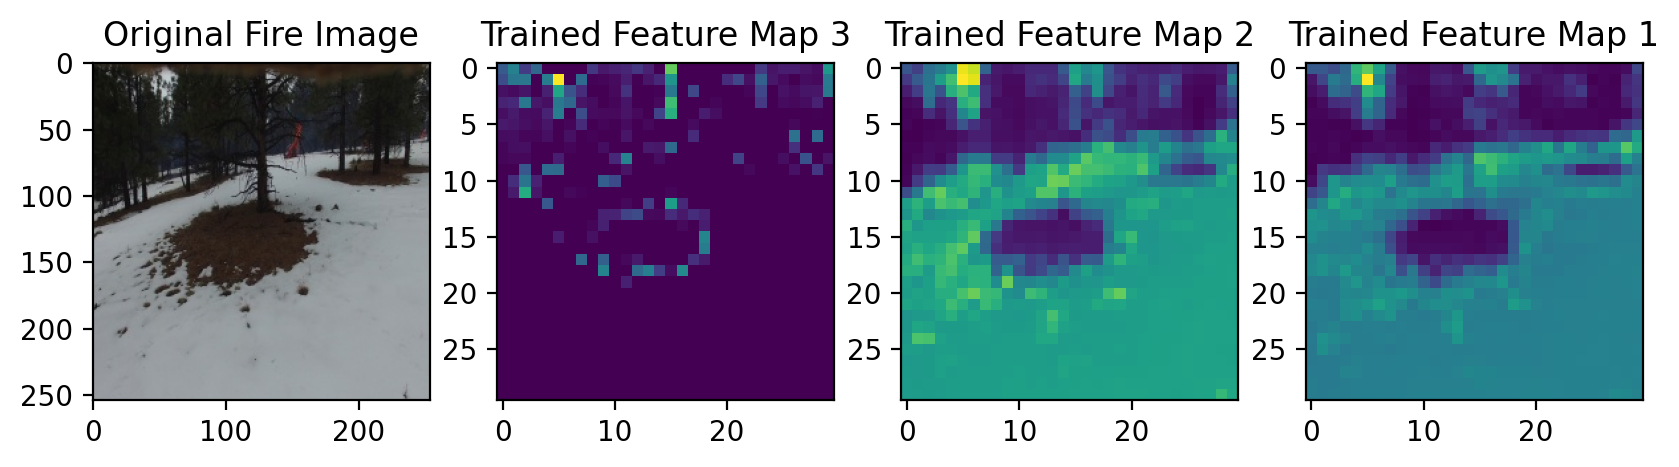

In [ ]:
# visualising the last convolutional layer of the trained model

print("Those are the fire test image's feature maps of the last convolutional layer after training the model (in latent space)")
# plots of features maps

fig,ax=plt.subplots(1,4,figsize=(10,10))

ax[0].imshow(X_test_images[0])
ax[0].title.set_text('Original Fire Image')

ax[3].imshow(intermediate_output[0,:,:,2])
ax[3].title.set_text('Trained Feature Map 1')

ax[2].imshow(intermediate_output[0,:,:,1])
ax[2].title.set_text('Trained Feature Map 2')

ax[1].imshow(intermediate_output[0,:,:,0])
ax[1].title.set_text('Trained Feature Map 3')

fig.savefig('Binary Classification: Last Convolutional Layer untrained model for fire image')


Those are the no-fire test image's feature maps of the last convolutional layer after training the model (in latent space)


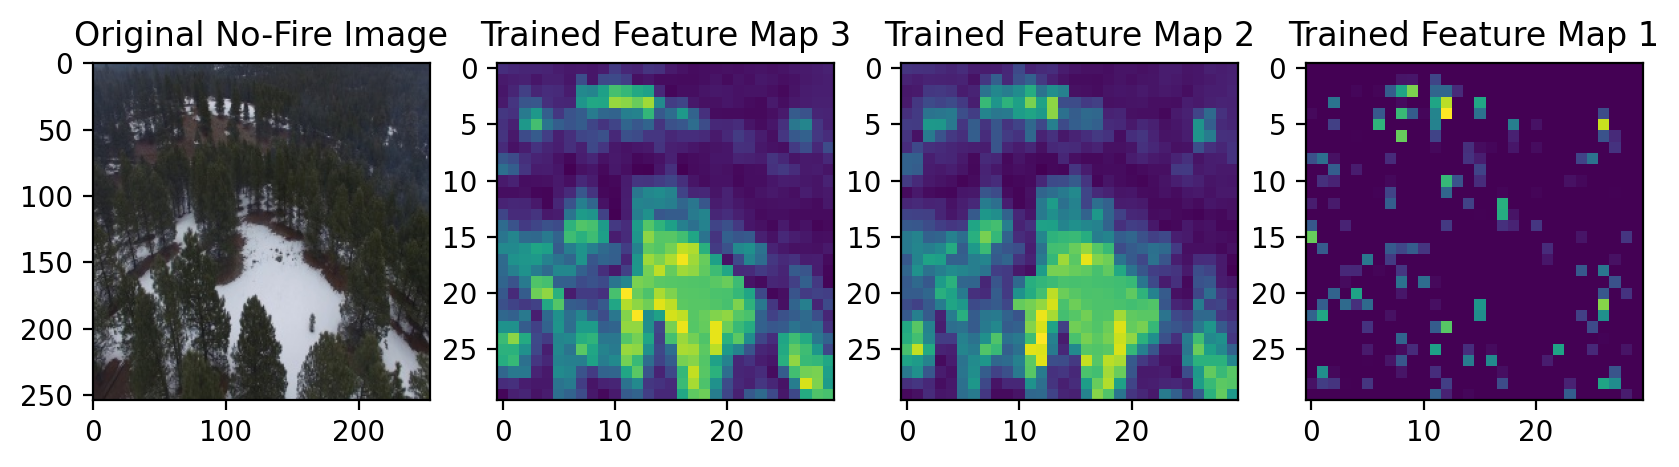

In [ ]:
# visualising the last convolutional layer of the trained model

print("Those are the no-fire test image's feature maps of the last convolutional layer after training the model (in latent space)")
# plots of features maps
fig,ax=plt.subplots(1,4,figsize=(10,10))

ax[0].imshow(X_test_images[1])
ax[0].title.set_text('Original No-Fire Image')

ax[3].imshow(intermediate_output[1][:,:,0])
ax[3].title.set_text('Trained Feature Map 1')

ax[2].imshow(intermediate_output[1][:,:,1])
ax[2].title.set_text('Trained Feature Map 2')

ax[1].imshow(intermediate_output[1][:,:,2])
ax[1].title.set_text('Trained Feature Map 3')

fig.savefig('Binary Classification: Last Convolutional Layer trained model for no-fire image')


## Comment
At the last CNN layer, the size of the image has gone from a size of (254,254,3) to 3 feature map of the size of (30,30,1) which outline the edges of the original image. Overall, the trained feature map is better at capturing the subtle detail such as edges.

## Comparing Our Model to advance standard model (VGG16) for image recognition
In this section, we will perform the binary classification using a pre-trained advance model (called VGG16) and compare our model performance to this pre-trained model.

In [ ]:
# importing libraries for the pre-trained model called VGG 16

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# Import the VGG 16 library and add preprocessing layer to the front of VGG
# we use the imagenet weights

vgg16 = VGG16(input_shape=(254,254,3),weights='imagenet',include_top=False) # include_top basically remove the first and the last layer of the VGG16 model

# As VGG16 is a pre-trained model, we do not have to train the parameter (only the parameter close to the input and output layer)
for layer in vgg16.layers:
    layer.trainable = False

Type_of_classes = np.array([0,1]) # 0 and 1 corresponds to fire and no-fire images

# flattening the layer
x = Flatten()(vgg16.output)

prediction = Dense(len(Type_of_classes), activation='softmax')(x)

# create a model object
model_vgg16 = Model(inputs=vgg16.input, outputs=prediction)
model_vgg16.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model_vgg16.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 254, 254, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 254, 254, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 254, 254, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0  

In [ ]:
#hist = model.fit(data_augmentation.flow(train_img,train_lab, batch_size=20),epochs=5, validation_data=(valid_img,valid_lab))
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',start_from_epoch=0,mode='max',baseline=0.9,patience=0)
hist_VGG16 = model_vgg16.fit(data_augmentation1(train_img),train_lab, batch_size=100,epochs=40, validation_data=(data_augmentation1(valid_img),valid_lab),callbacks=[callback])


Epoch 1/40
3/3 [==============================] - 2s 445ms/step - loss: 0.7941 - accuracy: 0.6107 - val_loss: 0.0834 - val_accuracy: 1.0000
Epoch 2/40
3/3 [==============================] - 1s 300ms/step - loss: 0.1004 - accuracy: 0.9786 - val_loss: 0.1000 - val_accuracy: 0.9667


In [ ]:
test_loss_VGG16,test_acc_VGG16 = model_vgg16.evaluate(data_augmentation1(X_test_images),Y_test_labels, verbose=1)

13/13 [==============================] - 1s 53ms/step - loss: 0.6824 - accuracy: 0.8025


In [ ]:
print("The test accuracy for binary classification using pre-trained model VGG16 is "+str(test_acc_VGG16*100)+"%")
print("The test loss value for binary classification using pre-trained model VGG16 is "+str(test_loss_VGG16))

The test accuracy for binary classification using pre-trained model VGG16 is 80.25000095367432%
The test loss value for binary classification using pre-trained model VGG16 is 0.6824340224266052


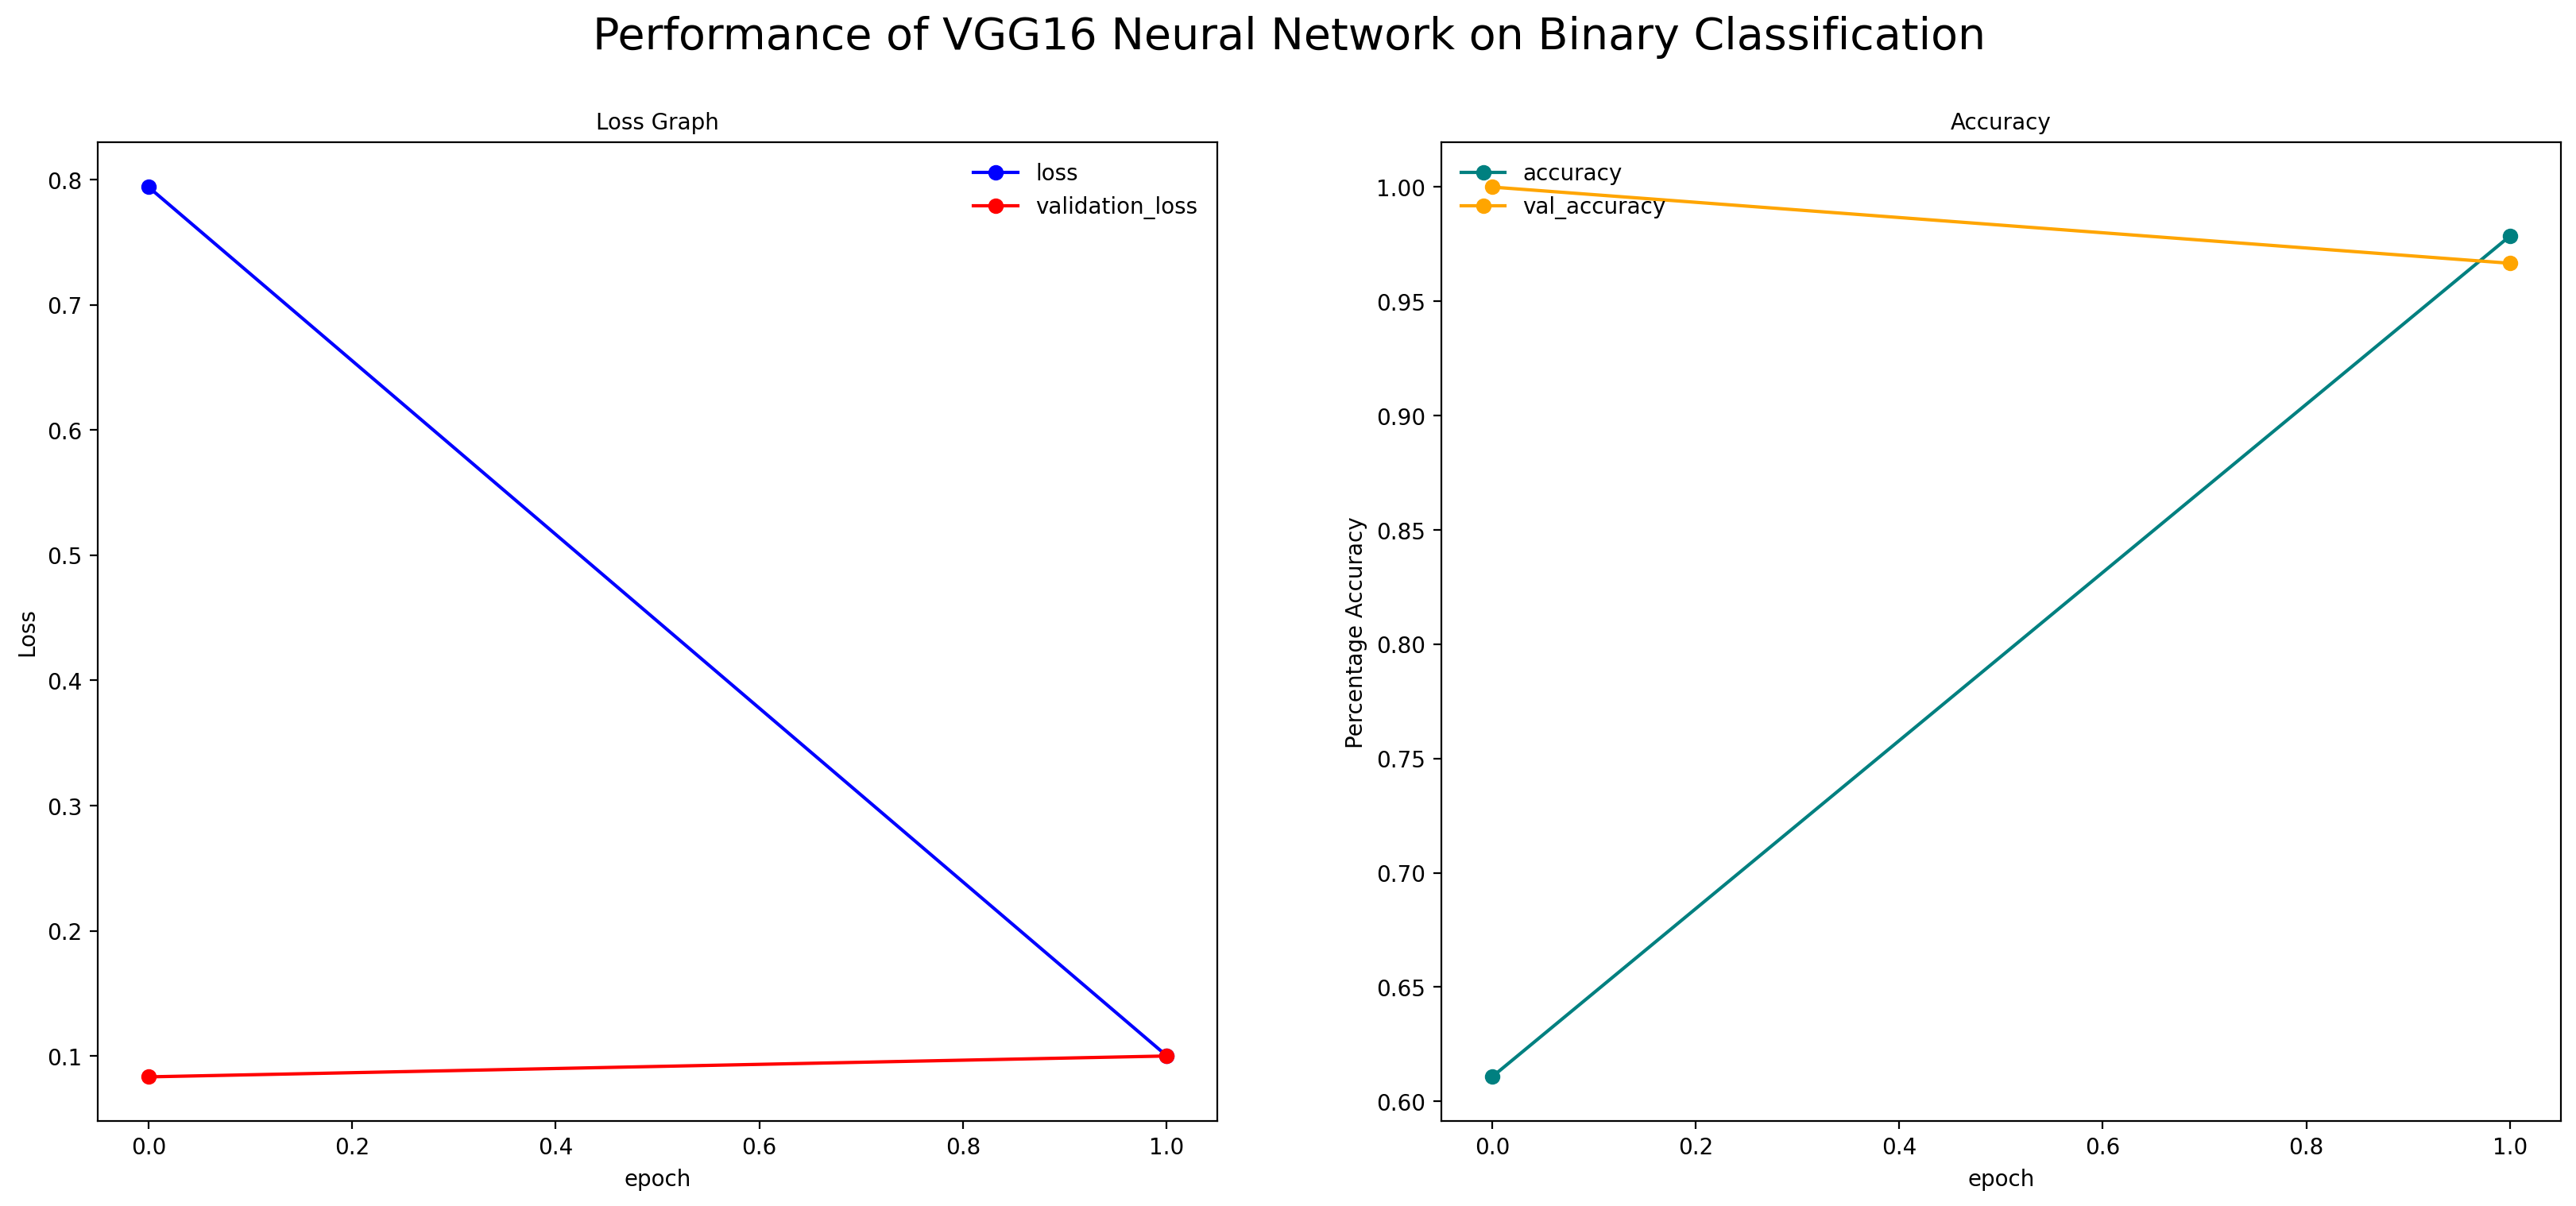

In [ ]:
# A plot of VGG16 model performance which is quantified by loss and accuracy
fig,ax=plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Performance of VGG16 Neural Network on Binary Classification',size=20)


ax[0].plot(hist_VGG16.history['loss'],color='blue',label='loss',marker='o')
ax[0].plot(hist_VGG16.history['val_loss'],color='red',label='validation_loss',marker='o')
ax[0].set_title("Loss Graph",fontsize=10)
ax[0].set_ylabel("Loss")
ax[0].set_xlabel('epoch')
ax[0].legend(loc='upper right')



ax[1].plot(hist_VGG16.history['accuracy'], color='teal', label='accuracy',marker='o')
ax[1].plot(hist_VGG16.history['val_accuracy'], color='orange', label='val_accuracy',marker='o')
ax[1].set_title("Accuracy",fontsize=10)
ax[1].set_ylabel("Percentage Accuracy")
ax[1].set_xlabel('epoch')
ax[1].legend(loc='upper left')


fig.savefig('VGG16 Pre-trained Model Binary Classification Performance')

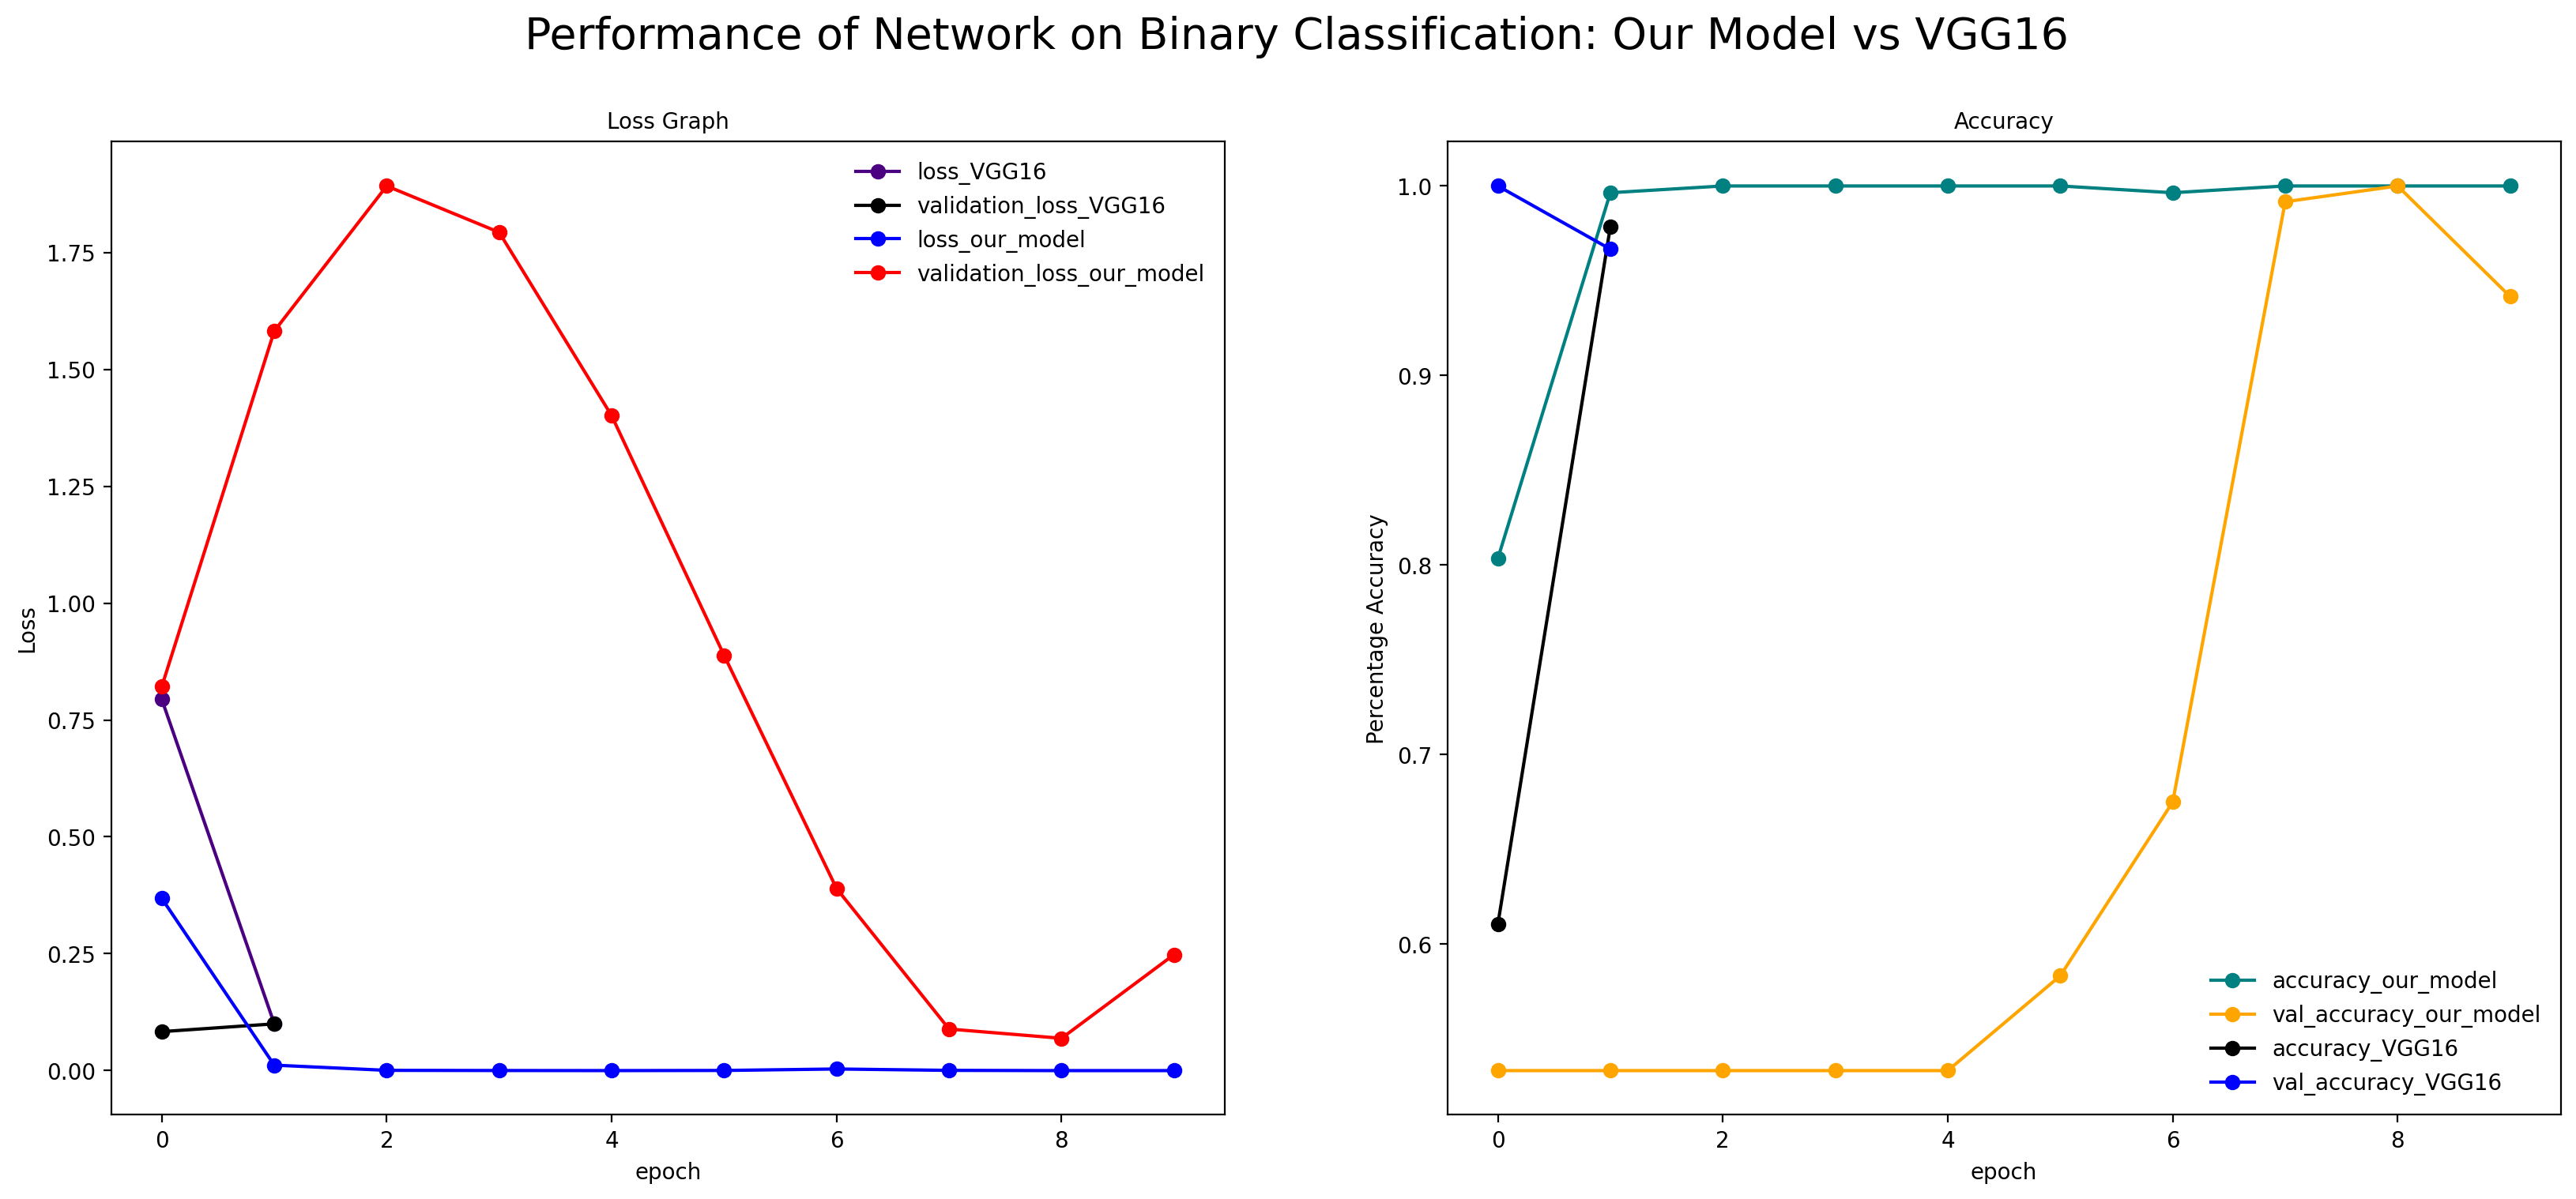

In [ ]:
# Comparison Plot between Our Model and VG16

fig,ax=plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Performance of Network on Binary Classification: Our Model vs VGG16',size=20)


ax[0].plot(hist_VGG16.history['loss'],color='indigo',label='loss_VGG16',marker='o')
ax[0].plot(hist_VGG16.history['val_loss'],color='black',label='validation_loss_VGG16',marker='o')
ax[0].set_title("Loss Graph",fontsize=10)
ax[0].set_ylabel("Loss")
ax[0].set_xlabel('epoch')
ax[0].legend(loc='upper right')


ax[0].plot(hist.history['loss'],color='blue',label='loss_our_model',marker='o')
ax[0].plot(hist.history['val_loss'],color='red',label='validation_loss_our_model',marker='o')
ax[0].set_title("Loss Graph",fontsize=10)
ax[0].set_ylabel("Loss")
ax[0].set_xlabel('epoch')
ax[0].legend(loc='upper right')



ax[1].plot(hist.history['accuracy'], color='teal', label='accuracy_our_model',marker='o')
ax[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy_our_model',marker='o')
ax[1].set_title("Accuracy",fontsize=10)
ax[1].set_ylabel("Percentage Accuracy")
ax[1].set_xlabel('epoch')
ax[1].legend(loc='upper left')

ax[1].plot(hist_VGG16.history['accuracy'], color='black', label='accuracy_VGG16',marker='o')
ax[1].plot(hist_VGG16.history['val_accuracy'], color='blue', label='val_accuracy_VGG16',marker='o')
ax[1].set_title("Accuracy",fontsize=10)
ax[1].set_ylabel("Percentage Accuracy")
ax[1].set_xlabel('epoch')
ax[1].legend(loc='best')

fig.savefig('Comparison: Binary Classification Performance')

## **Comment**

By comparing our CNN model to standard optimised model (VGG16) for image recognition, we can see that our model perform better than VGG16 both in terms of test accuracy and computational cost. But, VGG 16 converge to high accuracy much faster than our CNN model during the training phase which might be due to the fact that VGG16 is a much deep neural network hence it would be able to learn the underlying pattern of the images much quicker than our shallower CNN model.